In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [2]:
customers = pd.read_csv(r"C:\Users\hp\Downloads\Mall_Customers.csv", index_col = "CustomerID")

In [6]:
customers.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
customers.drop_duplicates()
customers['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [22]:
le = LabelEncoder()
customers['Gender'] = le.fit_transform(customers['Gender'])

In [27]:
robust_scaler = RobustScaler()
customers_scaled = robust_scaler.fit_transform(customers)
customers_scaled_df = pd.DataFrame(customers_scaled)

In [30]:
customers_scaled_df.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,0.140741,-0.025753,0.005229
std,0.497633,0.689828,0.719581,0.675125
min,0.000000,-0.888889,-1.273973,-1.281046
25%,0.000000,-0.358025,-0.547945,-0.398693
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.641975,0.452055,0.601307
max,1.000000,1.679012,2.068493,1.281046


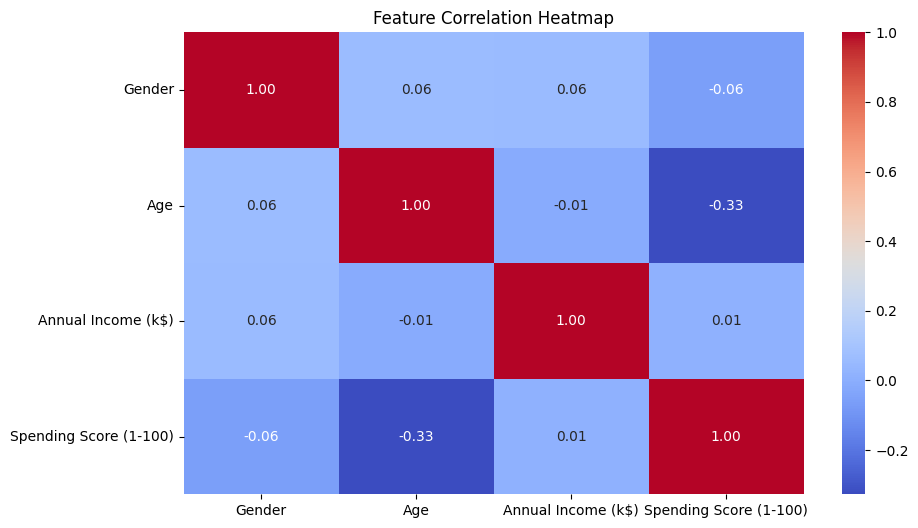

In [32]:
selected_features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

corr_matrix = customers[selected_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
from sklearn.cluster import KMeans
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = customers[selected_features]

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

customers['Cluster'] = clusters

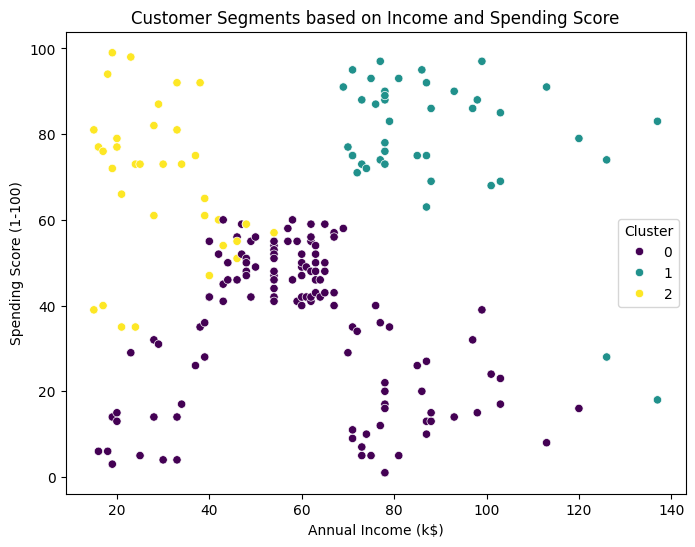

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=customers,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis'
)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [37]:
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

labels = kmeans.labels_
print("\nLabels:")
print(labels)

Centroids:
[[44.48387097 59.87903226 35.42741935]
 [32.97560976 88.73170732 79.24390244]
 [25.77142857 29.97142857 68.51428571]]

Labels:
[2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1]


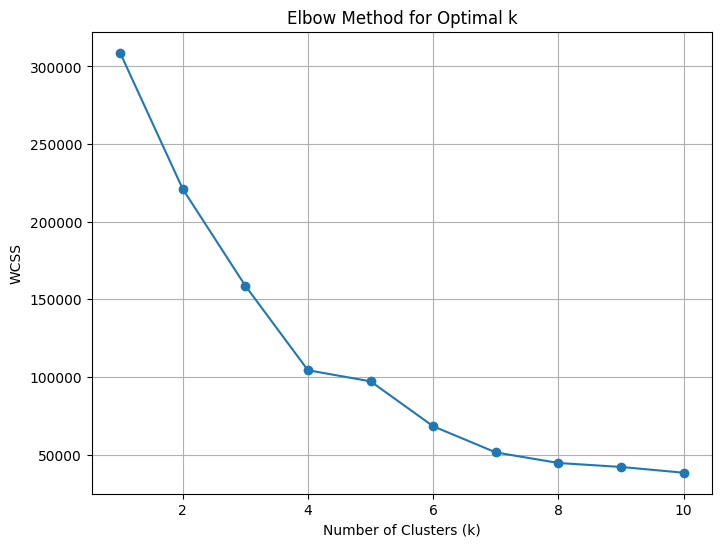

In [39]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

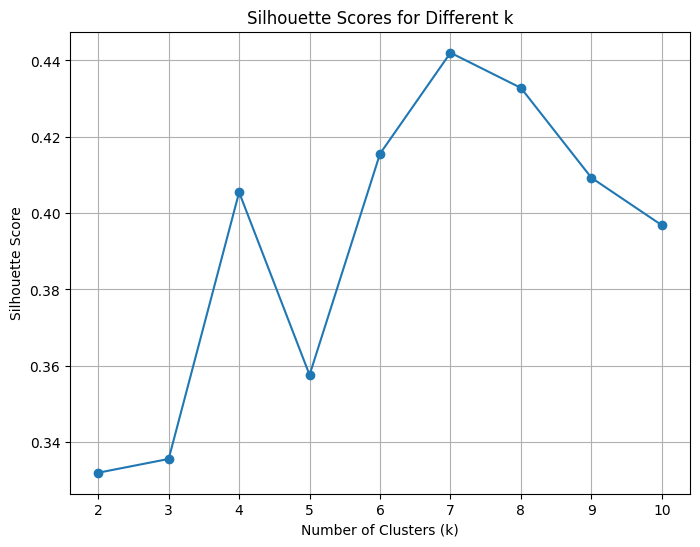

In [41]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # must be ≥2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


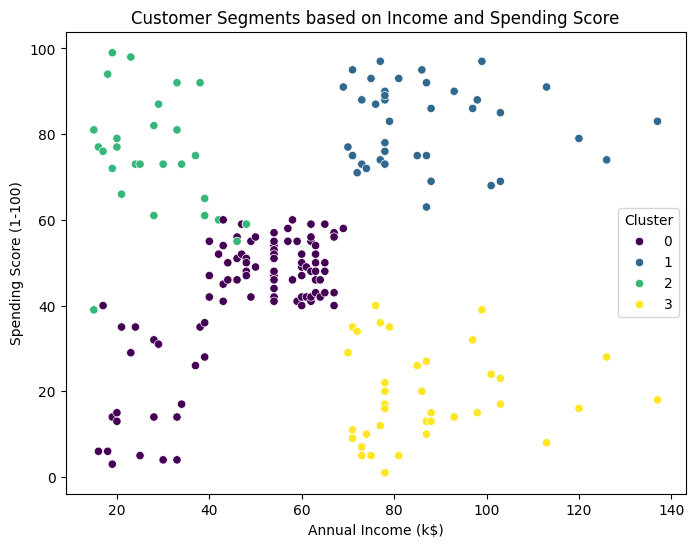

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

customers['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=customers,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis'
)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

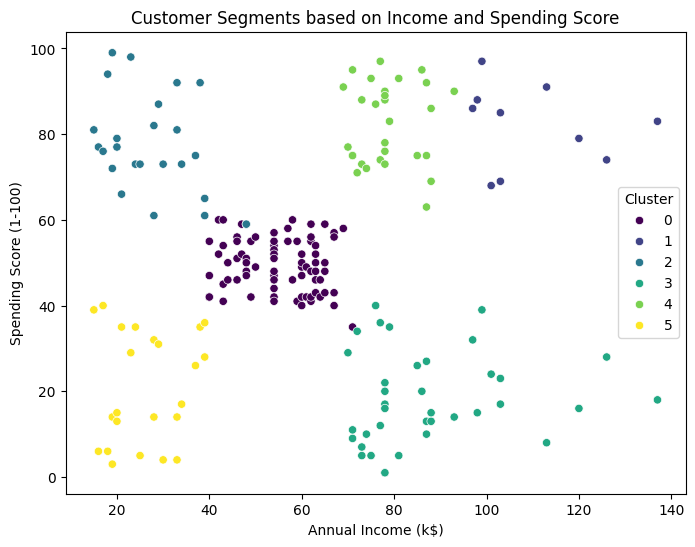

In [46]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

customers['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=customers,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis'
)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()